<a href="https://colab.research.google.com/github/cauqqzhang/SAR_libs/blob/main/Revised_wishart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy
data= numpy.load("/content/drive/My Drive/HalA.npz")
H=data['H'].flatten()
alpha=data['al'].flatten()


FileNotFoundError: ignored

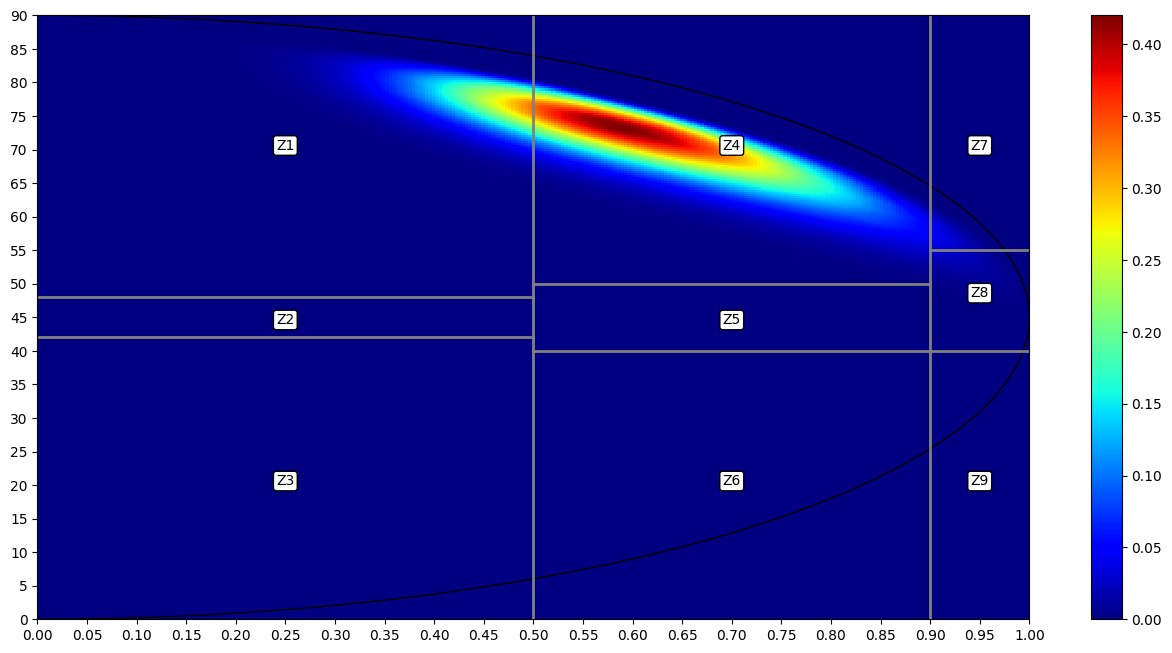

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from scipy.stats import gaussian_kde
max=H.shape[0]
#max=100
where_are_NaNs = numpy.isnan(H)
H[where_are_NaNs] = 0
where_are_NaNs = numpy.isnan(alpha)
alpha[where_are_NaNs] = 0
x=H[:max]
y=alpha[:max]
fig, ax = plt.subplots(figsize=(16, 8),dpi= 100)
plt.scatter(x,y)
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = gaussian_kde([x,y])
xi, yi = numpy.mgrid[0:1:nbins*1j, 0:90:nbins*1j]
zi = k(numpy.vstack([xi.flatten(), yi.flatten()]))

# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap=plt.cm.jet)
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.jet)
plt.colorbar()


plt.xlim(0,  1)
plt.xticks([0. , 0.05,0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4, 0.45,0.5,0.55, 0.6, 0.65,0.7,0.75, 0.8,0.85 ,0.9, 0.95,1. ])
plt.ylim(0,  90)
plt.yticks([0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,85, 90])
xs=[0.25,0.25,0.25,0.7,0.7,0.7,0.95,0.95,0.95]
ys=[70,44,20,70,44,20,70,48,20]
a1pha_bound=[55,50,48,42,40]


plt.axhline(y=42, xmin=0, xmax=0.5, linewidth=2, color = 'gray')
plt.axhline(y=48, xmin=0, xmax=0.5, linewidth=2, color = 'gray')
plt.axhline(y=40, xmin=0.9, xmax=1, linewidth=2, color = 'gray')
plt.axhline(y=55, xmin=0.9, xmax=1, linewidth=2, color = 'gray')
plt.axhline(y=40, xmin=0.5, xmax=0.9, linewidth=2, color = 'gray')
plt.axhline(y=50, xmin=0.5, xmax=0.9, linewidth=2, color = 'gray')
plt.axvline(x=0.5, ymin=0, ymax = 90, linewidth=2, color='gray')
plt.axvline(x=0.9, ymin=0, ymax = 90, linewidth=2, color='gray')
zoneindex=0
for x,y in zip(xs,ys):
    plt.annotate('Z'+str(zoneindex+1),(x,y), textcoords="offset points", xytext=((0,0)),  ha='center',bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=1),) # horizontal alignment can be left, right or center
    zoneindex= zoneindex+1
ax.add_patch(Arc((0, 45), 2, 90,
                 theta1=-90, theta2=90, edgecolor='k'))
plt.savefig("/content/drive/My Drive/H_alpha_plane.jpg")
print("OK")
#plt.show()

In [ ]:

x=numpy.array([3+1j*0,7+1j*8,7-1j*8,5+0j]).reshape(2,2)
y=numpy.array([13+1j*0,17+1j*18,17-18j,15+0j]).reshape(2,2)
def distance_r_wishart(A, B):
    logdet=numpy.log(numpy.linalg.det(B) / numpy.linalg.det(A))
    dim = A.shape[0]
    #d= numpy.trace(numpy.dot(numpy.linalg.inv(B), A)) - dim + logdet
    d=numpy.real(numpy.trace(numpy.matrix(B).getH()*numpy.matrix(A)) - dim + logdet)
    #d22= numpy.real(A[0][0]) * numpy.real(B[0][0]) + numpy.real(A[1][1])* numpy.real(B[1][1]) + 2 * ((numpy.real(A[0][1])* numpy.real(B[0][1])+numpy.imag(A[0][1])* numpy.imag(B[0][1]))) + logdet-dim

    return d
def distance_kullback(A, B):
    """Kullback leibler divergence between two covariance matrices A and B.
    :param A: First covariance matrix
    :param B: Second covariance matrix
    :returns: Kullback leibler divergence between A and B
    """
    dim = A.shape[0]
    logdet = numpy.log(numpy.linalg.det(B) / numpy.linalg.det(A))
    kl = numpy.trace(numpy.dot(numpy.linalg.inv(B), A)) - dim + logdet
    return 0.5 * kl


def distance_kullback_right(A, B):
    """wrapper for right kullblack leibler div."""
    return distance_kullback(B, A)


def distance_kullback_sym(A, B):
    """Symetrized kullback leibler divergence."""
    return distance_kullback(A, B) + distance_kullback_right(A, B)


def distance_euclid(A, B):
    """Euclidean distance between two covariance matrices A and B.
    The Euclidean distance is defined by the Froebenius norm between the two
    matrices.
    .. math::
            d = \Vert \mathbf{A} - \mathbf{B} \Vert_F
    :param A: First covariance matrix
    :param B: Second covariance matrix
    :returns: Eclidean distance between A and B
    """
    return numpy.linalg.norm(A - B, ord='fro')


def distance_logeuclid(A, B):
    """Log Euclidean distance between two covariance matrices A and B.
    .. math::
            d = \Vert \log(\mathbf{A}) - \log(\mathbf{B}) \Vert_F
    :param A: First covariance matrix
    :param B: Second covariance matrix
    :returns: Log-Eclidean distance between A and B
    """
    return distance_euclid(logm(A), logm(B))


def distance_riemann(A, B):
    """Riemannian distance between two covariance matrices A and B.
    .. math::
            d = {\left( \sum_i \log(\lambda_i)^2 \\right)}^{-1/2}
    where :math:`\lambda_i` are the joint eigenvalues of A and B
    :param A: First covariance matrix
    :param B: Second covariance matrix
    :returns: Riemannian distance between A and B
    """
    return numpy.sqrt((numpy.log(eigvalsh(A, B))**2).sum())


def distance_logdet(A, B):
    """Log-det distance between two covariance matrices A and B.
    .. math::
            d = \sqrt{\left(\log(\det(\\frac{\mathbf{A}+\mathbf{B}}{2})) - 0.5 \\times \log(\det(\mathbf{A}) \det(\mathbf{B}))\\right)}  # noqa
    :param A: First covariance matrix
    :param B: Second covariance matrix
    :returns: Log-Euclid distance between A and B
    """
    return numpy.sqrt(numpy.log(numpy.linalg.det(B) / numpy.linalg.det(A)))


def distance_wasserstein(A, B):
    """Wasserstein distance between two covariances matrices.
    .. math::
        d = \left( {tr(A + B - 2(A^{1/2}BA^{1/2})^{1/2})}\\right )^{1/2}
    :param A: First covariance matrix
    :param B: Second covariance matrix
    :returns: Wasserstein distance between A and B
    """
    B12 = sqrtm(B)
    C = sqrtm(numpy.dot(numpy.dot(B12, A), B12))
    return numpy.sqrt(numpy.trace(A + B - 2*C))
distance_methods = {'riemann': distance_riemann,
                    'logeuclid': distance_logeuclid,
                    'euclid': distance_euclid,
                    'logdet': distance_logdet,
                    'kullback': distance_kullback,
                    'kullback_right': distance_kullback_right,
                    'kullback_sym': distance_kullback_sym,
                    'wasserstein': distance_wasserstein,
                    'r_wishart':distance_r_wishart}
def distance(A, B, metric='riemann'):
    """Distance between two covariance matrices A and B according to the metric.
    :param A: First covariance matrix
    :param B: Second covariance matrix
    :param metric: the metric (Default value 'riemann'), can be : 'riemann' ,
    'logeuclid' , 'euclid' , 'logdet', 'kullback', 'kullback_right',
    'kullback_sym'.
    :returns: the distance between A and B
    """
    if callable(metric):
        distance_function = metric
    else:
        distance_function = distance_methods[metric]

    if len(A.shape) == 3:
        d = numpy.empty((len(A), 1))
        for i in range(len(A)):
            d[i] = distance_function(A[i], B)
    else:
        d = distance_function(A, B)

    return d
distance(x, y, metric='r_wishart')


639.4505139538542